In [2]:
#from samap.mapping import SAMAP
#from samap.analysis import get_mapping_scores, GenePairFinder
#from samalg import SAM
#from samap.utils import save_samap, load_samap
import pandas as pd
import scanpy as sc
import numpy as np

In [2]:
data_path = "../data-in/integration/"

## Load data

In [14]:
hs_data = sc.read_h5ad(data_path + "Tyser_2020/adata.h5ad")
hs_data

AnnData object with n_obs × n_vars = 1195 × 57490
    obs: 'celltype', 'stage'
    obsm: 'UMAP'

In [21]:
mf_data = sc.read_h5ad(data_path + "Yang_2021/adata.h5ad")
mf_data

AnnData object with n_obs × n_vars = 7194 × 19367
    obs: 'celltype', 'stage', 'sizeFactor'
    obsm: 'UMAP'
    layers: 'logcounts'

## Compute feature mapping

In [7]:
# Rabbit
r_ensembl = pd.read_csv("rabbit_transcript_data.tsv",sep="\t")
r_genes = pd.read_csv("rabbit_genes.tsv",sep="\t")
r_names = [(y,x) for x in r_genes["x"] for y in r_ensembl.loc[r_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"] ]


In [8]:
# Mouse
m_ensembl = pd.read_csv("mouse_transcript_data.tsv",sep="\t")
m_genes = pd.read_csv("mouse_genes.tsv",sep="\t")
m_names = [(y,x) for x in m_genes["x"] for y in m_ensembl.loc[m_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"] ]

In [73]:
# Mouse extended
mext_ensembl = pd.read_csv("mouse_ext_transcript_data.tsv",sep="\t")
mext_genes = pd.read_csv("mouse_ext_genes.tsv",sep="\t")
mext_names = [(y,x) for x in mext_genes["x"] for y in mext_ensembl.loc[mext_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"] ]

In [3]:
# NHP
nhp_ensembl = pd.read_csv(data_path + "nhp_transcript_data.tsv",sep="\t")
nhp_genes = pd.read_csv(data_path + "nhp_genes.tsv",sep="\t")
nhp_names = [(y,x) for x in nhp_genes["x"] for y in nhp_ensembl.loc[nhp_ensembl["ensembl_gene_id"]==x,"ensembl_transcript_id_version"] ]

In [52]:
# Human
h_ensembl = pd.read_csv(data_path + "human_transcript_data.tsv",sep="\t")
h_genes = pd.read_csv(data_path + "human_genes.tsv",sep="\t")
h_names = [(y,x) for x in h_genes["x"] for y in h_ensembl.loc[h_ensembl["external_gene_name"]==x,"ensembl_transcript_id_version"] ]

In [12]:
h_names[1:5]

[('ENST00000263100.8', 'A1BG'),
 ('ENST00000595014.1', 'A1BG'),
 ('ENST00000598345.1', 'A1BG'),
 ('ENST00000600966.1', 'A1BG')]

### Load pre-computed feature mappings

In [4]:
import csv
with open(data_path +'r_names.tsv') as f:
    r_names=[tuple(line) for line in csv.reader(f,delimiter='\t')]

In [54]:
with open('data/m_names.tsv') as f:
    m_names=[tuple(line) for line in csv.reader(f,delimiter='\t')]

In [13]:
# Save mapping
#np.savetxt("data/r_names.tsv", r_names, delimiter="\t", fmt='%s')
#np.savetxt("data/m_names.tsv", m_names, delimiter="\t", fmt='%s')
#np.savetxt("nhp_names_tuple.tsv", nhp_names, delimiter="\t", fmt='%s')
#np.savetxt("human_names_tuple.tsv", h_names, delimiter="\t", fmt='%s')

### Create sample data

In [133]:
import random

In [134]:
rabbit_sample = rabbit[random.sample(range(rabbit.n_obs), 5000),:]

In [136]:
rabbit_sample.write("data/rabbit_sample.h5ad")

In [137]:
mouse_sample = mouse[random.sample(range(mouse.n_obs), 5000),:]

In [138]:
mouse_sample.write("data/mouse_sample.h5ad")

View of AnnData object with n_obs × n_vars = 5000 × 29452
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'sizeFactors', 'sizeFactor'
    var: 'ensembl_ids', 'gene_names'
    uns: 'dataset', 'hyperparams', 'species'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

### Compute SAMAP

In [3]:
# Sample
#m_path = "data/mouse_sample.h5ad"
#r_path = "data/rabbit_sample.h5ad"

In [40]:
#r_sam = sc.read_h5ad("data/rabbit_sample_pr.h5ad") - sample
r_sam = sc.read_h5ad(base_path + "data/processed/rabbit/processed_full_pr.h5ad")

In [41]:
#m_sam = sc.read_h5ad("data/mouse_sample_pr.h5ad") - sample
m_sam = sc.read_h5ad("data/mouse_data_pr.h5ad")

In [74]:
mext_sam = sc.read_h5ad(base_path + "data/processed/mouse_extended_atlas/python/embryo_dimred_mnnpca_pr.h5ad")
mext_sam = sc.external.tl.sam(mext_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7289047251699866
Iteration: 2, Convergence: 0.02251242606746546
Computing the UMAP embedding...
Elapsed time: 5937.686568498611 seconds


In [45]:
r_sam = sc.external.tl.sam(r_sam,inplace=True)
m_sam = sc.external.tl.sam(m_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8401708173504092
Iteration: 2, Convergence: 0.01157937752451288
Computing the UMAP embedding...
Elapsed time: 1688.1016952991486 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.846876451565616
Iteration: 2, Convergence: 0.011663026533466018
Computing the UMAP embedding...
Elapsed time: 1426.7018620967865 seconds


In [56]:
sm = SAMAP(r_sam,m_sam,"ra","mo",f_maps=base_path + "integration/SAMap/maps/",names1=r_names,names2=m_names,save_processed=False)

Preparing data 1 for SAMap.
Preparing data 2 for SAMap.
Coarsening gene connectivity graph using labels `ra`, round 0.
Coarsening gene connectivity graph using labels `ra`, round 1.
Coarsening gene connectivity graph using labels `mo`, round 0.
Coarsening gene connectivity graph using labels `mo`, round 1.
20004 `ra` genes and 20339 `mo` gene symbols match between the datasets and the BLAST graph.


In [75]:
sm = SAMAP(r_sam,mext_sam,"ra","mo",f_maps=base_path + "integration/SAMap/maps/",names1=r_names,names2=mext_names,save_processed=False)

Preparing data 1 for SAMap.
Preparing data 2 for SAMap.
Coarsening gene connectivity graph using labels `ra`, round 0.
Coarsening gene connectivity graph using labels `ra`, round 1.
Coarsening gene connectivity graph using labels `mo`, round 0.
Coarsening gene connectivity graph using labels `mo`, round 1.
19947 `ra` genes and 18370 `mo` gene symbols match between the datasets and the BLAST graph.


In [ ]:
save_samap(sm,base_path + "integration/SAMap/out/rabbit-mouse/notebook_samap_prealigned")

In [44]:
sm

### Load precomputed SAMAP

In [4]:
sm = load_samap("data/samap_sample")

### Run SAMAP

In [76]:
aligned_sm = sm.run()

Stitching SAM 0 and SAM 1
Found 179053 gene pairs
Recomputing PC projections with gene pair subsets...
Running hsnwlib
Using leiden_clusters and leiden_clusters cluster labels.
Out-neighbor smart expansion 1
Out-neighbor smart expansion 2
Indegree coarsening
0/22 (0, 146133) False
1/22 (20000, 146133) False
2/22 (40000, 146133) False
3/22 (60000, 146133) False
4/22 (80000, 146133) False
5/22 (100000, 146133) False
6/22 (120000, 146133) False
7/22 (140000, 146133) False
8/22 (160000, 146133) False
9/22 (180000, 146133) False
10/22 (200000, 146133) False
11/22 (220000, 146133) False
12/22 (240000, 146133) False
13/22 (260000, 146133) False
14/22 (280000, 146133) False
15/22 (300000, 146133) False
16/22 (320000, 146133) False
17/22 (340000, 146133) False
18/22 (360000, 146133) False
19/22 (380000, 146133) False
20/22 (400000, 146133) False
21/22 (420000, 146133) False
Concatenating SAM objects...
ITERATION: 0 
Average alignment score (A.S.):  0.7517535815644636 
Max A.S. improvement: 0.89

In [ ]:
save_samap(aligned_sm,"out/rabbit-mouse/notebook_samap_aligned")
#save_samap(aligned_sm,"mouse-extended/notebook_samap_aligned")

In [77]:
aligned_sm.adata

AnnData object with n_obs × n_vars = 576472 × 41649
    obs: 'barcode', 'batch', 'cell', 'celltype', 'celltype.extended', 'cluster', 'cluster.stage', 'cluster.sub', 'cluster.theiler', 'doub.density', 'doublet', 'leiden', 'leiden_clusters', 'louvain', 'sample', 'sizeFactor', 'somite_count', 'stage', 'stage.mapped', 'stripped', 'tube_name', 'species'
    var: 'edge_weights'
    uns: 'neighbors', 'mdata', 'umap', 'homology_graph_reweighted', 'homology_graph', 'homology_gene_names', 'homology_gene_names1', 'homology_gene_names2'
    obsm: 'X_umap'
    layers: 'X_disp'
    obsp: 'connectivities'

In [78]:
aligned_sm.adata.write("mouse-extended/notebook_samap_aligned.h5ad")

## Rabbit, NHP, Human integration

In [44]:
oc_sam = sc.read_h5ad("../data-in/rabbit/anndata_pr.h5ad")
oc_sam = sc.external.tl.sam(oc_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8163244518990572
Iteration: 2, Convergence: 0.012158549966747997
Computing the UMAP embedding...
Elapsed time: 398.68681168556213 seconds


In [45]:
mf_sam = sc.read_h5ad(data_path + "Yang_2021/adata_pr.h5ad")
mf_sam = sc.external.tl.sam(mf_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.7622746210050914
Iteration: 2, Convergence: 0.011263295651001544
Computing the UMAP embedding...
Elapsed time: 37.47981667518616 seconds


In [50]:
hs_sam = sc.read_h5ad(data_path + "Tyser_2020/adata_pr.h5ad")
hs_sam = sc.external.tl.sam(hs_sam,inplace=True)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8295132013182482
Iteration: 2, Convergence: 0.021633181312952027
Computing the UMAP embedding...
Elapsed time: 18.070709466934204 seconds


In [5]:
hs_path = data_path + "Tyser_2020/adata.h5ad"
mf_path = data_path + "Yang_2021/adata.h5ad"
oc_path = "../data-in/rabbit/anndata.h5ad"

In [ ]:
oc_hs_samap = SAMAP(hs_sam, oc_sam, "oc", "hs",
           f_maps = data_path + 'maps/',
           names1=h_names,names2=r_names,
           save_processed=False)

In [47]:
oc_mf_samap = SAMAP(mf_sam, oc_sam, "mf", "oc",
           f_maps = data_path + 'maps/',
           names1=nhp_names,names2=r_names,
           save_processed=False)

Preparing data 1 for SAMap.
Preparing data 2 for SAMap.
Coarsening gene connectivity graph using labels `oc`, round 0.
Coarsening gene connectivity graph using labels `oc`, round 1.
Coarsening gene connectivity graph using labels `mf`, round 0.
Coarsening gene connectivity graph using labels `mf`, round 1.
18962 `oc` genes and 14091 `mf` gene symbols match between the datasets and the BLAST graph.


In [16]:
oc_mf_samap = oc_mf_samap.run()

Stitching SAM 0 and SAM 1
Found 117896 gene pairs
Recomputing PC projections with gene pair subsets...
Running hsnwlib
Using leiden_clusters and leiden_clusters cluster labels.
Out-neighbor smart expansion 1
Out-neighbor smart expansion 2
Indegree coarsening
0/8 (0, 7194) False
1/8 (20000, 7194) False
2/8 (40000, 7194) False
3/8 (60000, 7194) False
4/8 (80000, 7194) False
5/8 (100000, 7194) False
6/8 (120000, 7194) False
7/8 (140000, 7194) False
Concatenating SAM objects...
ITERATION: 0 
Average alignment score (A.S.):  0.3400135435255891 
Max A.S. improvement: 0.7732981898851843 
Min A.S. improvement: 0.0
Calculating gene-gene correlations in the homology graph...
Stitching SAM 0 and SAM 1
Found 26037 gene pairs
Recomputing PC projections with gene pair subsets...
Running hsnwlib
Using leiden_clusters and leiden_clusters cluster labels.
Out-neighbor smart expansion 1
Out-neighbor smart expansion 2
Indegree coarsening
0/8 (0, 7194) False
1/8 (20000, 7194) False
2/8 (40000, 7194) False


In [17]:
oc_mf_samap.adata.write("../data-out/integration/oc_mf_samap.h5ad")

In [4]:
oc_mf_adata = sc.read_h5ad("../data-out/integration/oc_mf_samap.h5ad")

In [18]:
oc_mf_adata = oc_mf_samap.adata

In [19]:
oc_mf_adata

AnnData object with n_obs × n_vars = 153327 × 27348
    obs: 'anatomical_loc', 'barcode', 'batch', 'cell', 'celltype', 'cluster', 'cluster.stage', 'cluster.sub', 'cluster.theiler', 'day', 'doub.density', 'doublet', 'leiden_clusters', 'leiden_res1', 'leiden_res10', 'leiden_res1_5', 'leiden_res2', 'leiden_res2_5', 'leiden_res3', 'leiden_res5', 'leiden_res6', 'leiden_res7', 'leiden_res8', 'sample', 'singler', 'sizeFactor', 'stage', 'stripped', 'species'
    var: 'edge_weights'
    uns: 'neighbors', 'mdata', 'umap', 'homology_graph_reweighted', 'homology_graph', 'homology_gene_names', 'homology_gene_names1', 'homology_gene_names2'
    obsm: 'X_umap'
    layers: 'X_disp'
    obsp: 'connectivities'

In [6]:
celltype_colour_list = [celltype_colours[x[3:]] for x in np.unique(oc_mf_adata.obs["celltype"])]

In [35]:
sc.tl.umap(oc_mf_adata,min_dist=0.8)

/hps/software/users/marioni/dkeitley/miniconda3/envs/SAMap/lib/python3.7/site-packages/umap/spectral.py:316: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


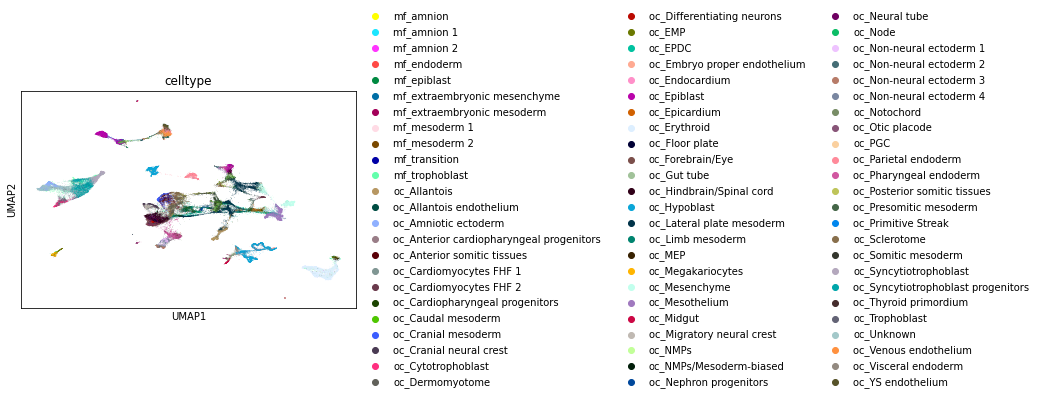

In [20]:
sc.pl.umap(oc_mf_adata,color="celltype")

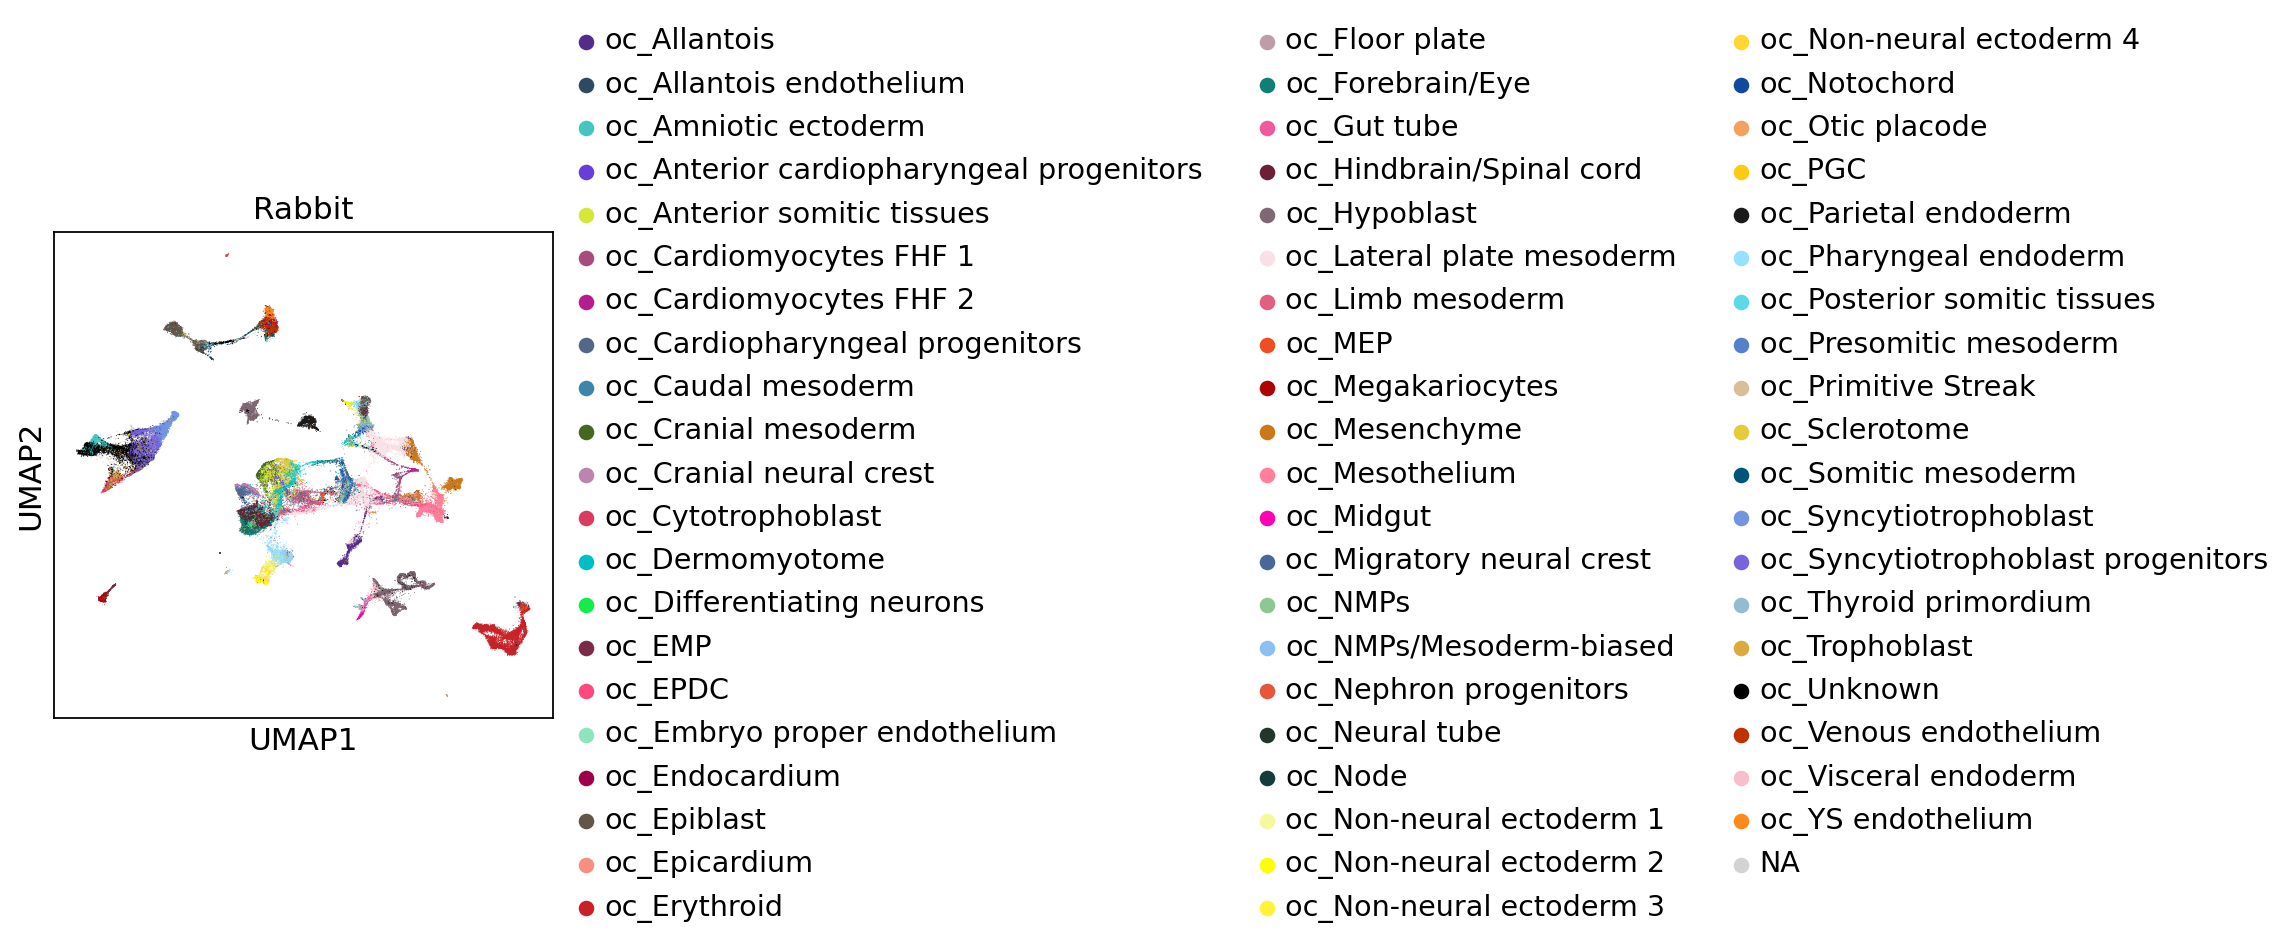

In [8]:
sc.pl.umap(oc_mf_adata,color=["celltype"], groups=[celltype for celltype in oc_mf_adata.obs["celltype"].unique() if celltype.startswith('oc')],
         title="Rabbit",palette=celltype_colour_list,save="_oc_mf_samap_oc_highlight_mindist01.pdf")

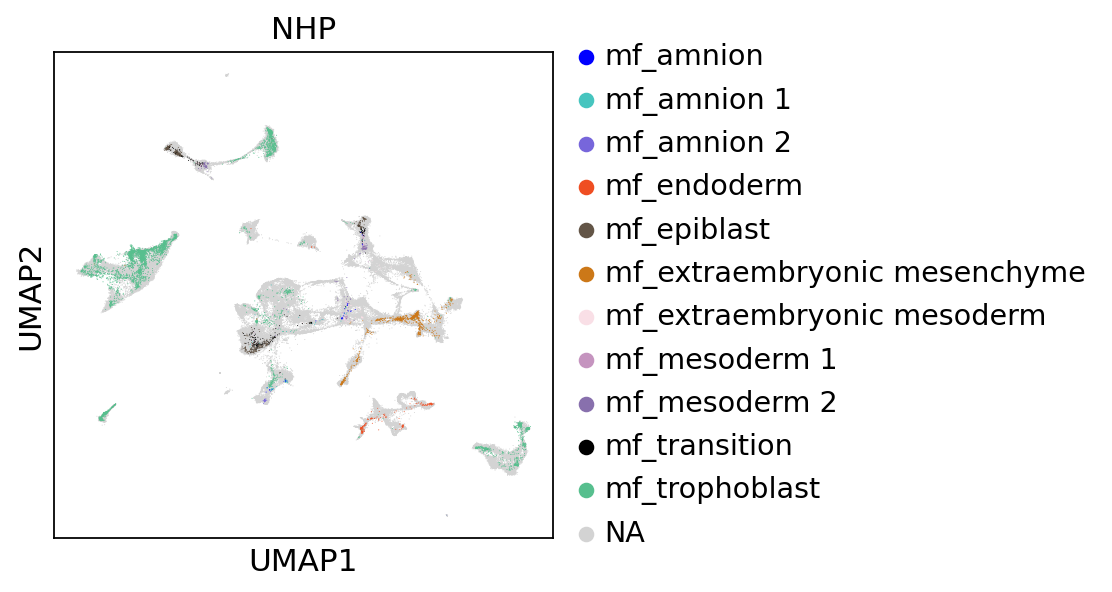

In [9]:
sc.pl.umap(oc_mf_adata,color=["celltype"], groups=[celltype for celltype in oc_mf_adata.obs["celltype"].unique() if celltype.startswith('mf')],
         title="NHP",palette=celltype_colour_list,save="_oc_mf_samap_mf_highlight_mindist01.pdf")

## Load precomputed SAMap results

In [3]:
rm_samap = sc.read_h5ad("../data-out/integration/oc_mm_integrated.h5ad")

In [4]:
rm_umap = pd.read_csv("../data-out/integration/oc_mm_integrated_umap.tsv",sep="\t",header=None,names=["UMAP1","UMAP2"])
rm_umap.index = rm_samap.obs.index

In [28]:
rm_samap

AnnData object with n_obs × n_vars = 576472 × 41649
    obs: 'barcode', 'batch', 'cell', 'celltype', 'celltype.extended', 'cluster', 'cluster.stage', 'cluster.sub', 'cluster.theiler', 'doub.density', 'doublet', 'leiden', 'leiden_clusters', 'louvain', 'sample', 'sizeFactor', 'somite_count', 'stage', 'stage.mapped', 'stripped', 'tube_name', 'species'
    var: 'edge_weights'
    uns: 'homology_gene_names', 'homology_gene_names1', 'homology_gene_names2', 'homology_graph', 'homology_graph_reweighted', 'mdata', 'neighbors', 'umap', 'leiden_colors'
    obsm: 'X_umap'
    layers: 'X_disp'
    obsp: 'connectivities'

In [6]:
rm_samap.obsm["X_umap"] = rm_umap

# Identify species specific clusters

In [7]:
import scipy.sparse as sp

In [10]:
def clusterSAMAP(adata, X=None, res=1, method="modularity", seed = 0):

        if X is None:
            X = adata.obsp["connectivities"]
            save = True
        else:
            if not sp.isspmatrix_csr(X):
                X = sp.csr_matrix(X)
            save = False

        import igraph as ig
        import leidenalg

        adjacency = X
        sources, targets = adjacency.nonzero()
        weights = adjacency[sources, targets]
        if isinstance(weights, np.matrix):
            weights = weights.A1
        g = ig.Graph(directed=True)
        g.add_vertices(adjacency.shape[0])
        g.add_edges(list(zip(sources, targets)))
        try:
            g.es["weight"] = weights
        except BaseException:
            pass

        if method == "significance":
            cl = leidenalg.find_partition(g, leidenalg.SignificanceVertexPartition,seed=seed)
        else:
            cl = leidenalg.find_partition(
                g, leidenalg.RBConfigurationVertexPartition, resolution_parameter=res,seed=seed
            )

        if save:
            if method == "modularity":
                adata.obs["leiden_clusters"] = pd.Categorical(
                    np.array(cl.membership)
                )
            elif method == "significance":
                adata.obs["leiden_sig_clusters"] = pd.Categorical(
                    np.array(cl.membership)
                )
        else:
            return np.array(cl.membership)

In [307]:
clusterSAMAP(rm_samap, res=10)

In [44]:
godsnot_102 = [
    "#FFFF00",
    "#1CE6FF",
    "#FF34FF",
    "#FF4A46",
    "#008941",
    "#006FA6",
    "#A30059",
    "#FFDBE5",
    "#7A4900",
    "#0000A6",
    "#63FFAC",
    "#B79762",
    "#004D43",
    "#8FB0FF",
    "#997D87",
    "#5A0007",
    "#809693",
    "#6A3A4C",
    "#1B4400",
    "#4FC601",
    "#3B5DFF",
    "#4A3B53",
    "#FF2F80",
    "#61615A",
    "#BA0900",
    "#6B7900",
    "#00C2A0",
    "#FFAA92",
    "#FF90C9",
    "#B903AA",
    "#D16100",
    "#DDEFFF",
    "#000035",
    "#7B4F4B",
    "#A1C299",
    "#300018",
    "#0AA6D8",
    "#013349",
    "#00846F",
    "#372101",
    "#FFB500",
    "#C2FFED",
    "#A079BF",
    "#CC0744",
    "#C0B9B2",
    "#C2FF99",
    "#001E09",
    "#00489C",
    "#6F0062",
    "#0CBD66",
    "#EEC3FF",
    "#456D75",
    "#B77B68",
    "#7A87A1",
    "#788D66",
    "#885578",
    "#FAD09F",
    "#FF8A9A",
    "#D157A0",
    "#BEC459",
    "#456648",
    "#0086ED",
    "#886F4C",
    "#34362D",
    "#B4A8BD",
    "#00A6AA",
    "#452C2C",
    "#636375",
    "#A3C8C9",
    "#FF913F",
    "#938A81",
    "#575329",
    "#00FECF",
    "#B05B6F",
    "#8CD0FF",
    "#3B9700",
    "#04F757",
    "#C8A1A1",
    "#1E6E00",
    "#7900D7",
    "#A77500",
    "#6367A9",
    "#A05837",
    "#6B002C",
    "#772600",
    "#D790FF",
    "#9B9700",
    "#549E79",
    "#FFF69F",
    "#201625",
    "#72418F",
    "#BC23FF",
    "#99ADC0",
    "#3A2465",
    "#922329",
    "#5B4534",
    "#FDE8DC",
    "#404E55",
    "#0089A3",
    "#CB7E98",
    "#A4E804",
    "#324E72"]

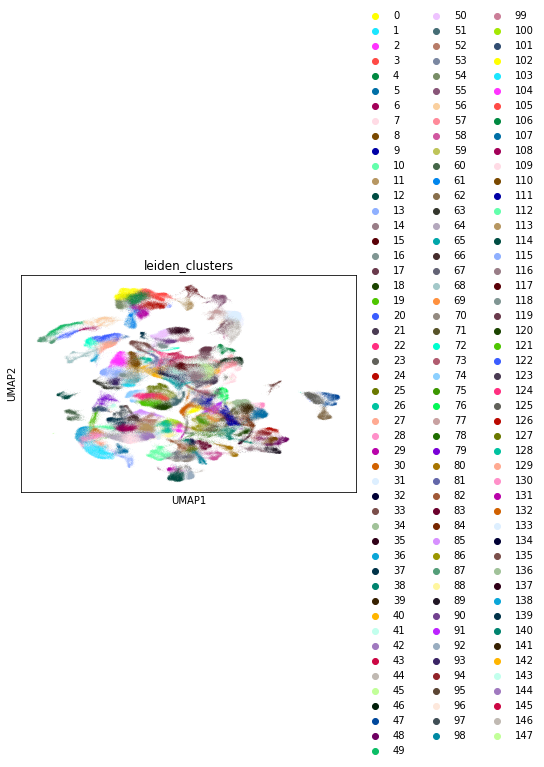

In [308]:
sc.pl.umap(rm_samap,color=["leiden_clusters"],palette=godsnot_102)

In [304]:
clust_counts

,leiden_clusters,species,barcode,species_specific
0,0,mo,7592,False
1,0,ra,1271,False
2,1,mo,8121,True
3,1,ra,467,False
4,2,mo,7632,True
...,...,...,...,...
313,156,ra,24,False
314,157,mo,266,True
315,157,ra,20,False
316,158,mo,24,True


In [315]:
# Get species specific clusters
clust_counts = pd.DataFrame(rm_samap.obs.groupby(['leiden_clusters','species']).count().iloc[:,0])
clust_counts.reset_index(inplace=True)
clust_counts["species_specific"] = clust_counts.groupby(["leiden_clusters"]).transform(lambda x: (x/x.sum()) > 0.85)
species_clusts = clust_counts.loc[clust_counts["species_specific"]==True][["leiden_clusters","species"]]
species_clusts

/hps/software/users/marioni/dkeitley/miniconda3/envs/SAMap/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  after removing the cwd from sys.path.


,leiden_clusters,species
0,0,mo
4,2,mo
6,3,mo
10,5,mo
22,11,mo
...,...,...
282,141,mo
286,143,mo
290,145,mo
292,146,mo


In [318]:
r_clusts = species_clusts[species_clusts["species"]=="ra"]["leiden_clusters"].values
m_clusts = species_clusts[species_clusts["species"]=="mo"]["leiden_clusters"].values

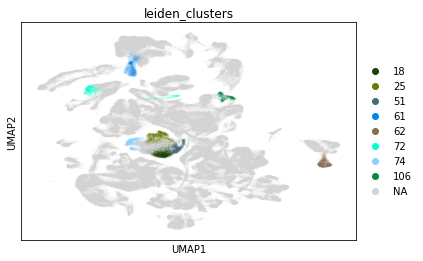

In [321]:
sc.pl.umap(rm_samap,color=["leiden_clusters"],groups=r_clusts,palette=godsnot_102)

In [322]:
# Export species specific clusters
r_extract =rm_samap[rm_samap.obs["species"]=="ra"]
m_extract = rm_samap[rm_samap.obs["species"]=="mo"]
r_extract.obs["leiden_clusters"].to_csv("../data-out/integration/oc_samap_clusters_res10.tsv",sep="\t")
m_extract.obs["leiden_clusters"].to_csv("../data-out/integration/mm_samap_clusters_res10.tsv",sep="\t")
species_clusts.to_csv("../data-out/integration/species_specific_clusters_res10.tsv",sep="\t")

In [323]:
r_extract.obs["leiden_clusters"]

,cell,leiden_clusters
cell_1,ra_cell_1,96
cell_2,ra_cell_2,72
cell_4,ra_cell_4,96
cell_5,ra_cell_5,74
cell_6,ra_cell_6,9
...,...,...
cell_172991,ra_cell_172991,61
cell_172992,ra_cell_172992,117
cell_172993,ra_cell_172993,61
cell_172994,ra_cell_172994,117


# Plot SAMAP results

In [7]:
sc.set_figure_params(dpi_save=600)
#sc.settings.figdir = "out/rabbit-mouse/figs/notebook/"
sc.settings.figdir = "../plots/integration/"



In [5]:
celltype_colours = {"NMP" : "#8EC792",
					"Brain/Neural tube":"#233629",
					"Allantoic mesoderm" : "#532C8A",
					"Placodes":"#FF5C00",
					"Cytotrophoblast" : "#da3c60",
					"Syncytiotrophoblast" : "#46c5bf",
					"Hypoblast" : "#d271d8",
					"Anterior Hypoblast" : "#e383a2",
					"Viceral yolk sac endoderm" : "#9d506e",
					"Yolk sac mesothelium" : "#ac4724",
					"Rostral amniotic ectoderm" : "#7295e2",
					"Caudal amniotic ectoderm" : "#7766db",
					"Anterior mesoderm" : "#C9EBFB",#might need to change
					"Anterior Hypoblast" : "#e383a2",
					"Limb Ectoderm" : "#f7f79e", 
					"Definitive Endoderm" : "#EF4E22",
					"Early amniotic ectoderm" : "#7295e2",
					"Late amniotic ectoderm" : "#7766db",
					"Neural Crest" : "#C3C388",
					"Neuroectoderm" : "#65A83E",
					"Brain/Neural Tube" : "#647a4f",
					"Placodes" : "#ac4724", #might need to change
					"Chorionic mesoderm" : "#913f04",
					"Trophoblast" : "#57bf8e",
					"Cranial Mesoderm" : "#6782c8",
					"Early Erythrocytes" : "#f79083",
					"Floor Plate" : "#0F4A9C",
					"Gut endoderm" : "#EF5A9D",
					"Megakaryocytes" : "#ac0404",
					"Chorion" : "#d8a746",
					"Cranial Mesoderm" : "#6782c8",
					"Rostral Mesoderm" : "#6069d8",
					"Late Erythrocytes" : "#EF4E22",
					"Early Erythrocytes" : "#f79083",
					"Notochord/Floor plate" : "#0F4A9C",
					"Cytotrophoblast" : "#da3c60",
					"Syncytiotrophoblast" : "#46c5bf",
					"Hypoblast" : "#d271d8",
					"Anterior hypoblast" : "#e383a2",
					"Viceral yolk sac endoderm" : "#9d506e",
					"Yolk sac mesothelium" : "#ac4724",
					"Rostral amniotic ectoderm" : "#7295e2",
					"Caudal amniotic ectoderm" : "#7766db",
					"ExE mesenchyme" : "#9d506e",
					"Allantoic mesoderm" : "#532C8A",
					"EXE mesoderm" : "#cc7818",
					"Posterior mesoderm" : "#8870ad",
					"Floor Plate" : "#0F4A9C",
					"Brain/Neural Tube" : "#647a4f",
					"Placodes" : "#ac4724", #might need to change
					"Chorionic mesoderm" : "#913f04",
					"Visceral YS endoderm" : "#9d506e",
					"Anterior mesoderm" : "#C9EBFB",#might need to change
					"Anterior Hypoblast" : "#e383a2",
					"Limb Ectoderm" : "#f7f79e", 
					"Gut endoderm" : "#EF5A9D",
					"Parietal YS endoderm" : "#1A1A1A",
					"Definitive Endoderm" : "#EF4E22",
					"Neural Crest" : "#C3C388",
					"Neuroectoderm" : "#65A83E",
					"Early amniotic ectoderm" : "#7295e2",
					"Late amniotic ectoderm" : "#7766db",
					"Posterior mesoderm": "#8870ad",
					"EXE mesoderm": "#cc7818",
					"Epiblast" : "#635547",
					"Primitive Streak" : "#DABE99",
					"Caudal epiblast" : "#9E6762",
					"PGC" : "#FACB12",
					"Anterior Primitive Streak" : "#C19F70",
					"Node":"#153B3D",
					"Notochord" : "#0F4A9C",
					"Gut tube" : "#EF5A9D",
					"Hindgut" : "#F397C0",
					"Midgut"  : "#FF00B2",
					"Foregut" : "#FFB7FF",
					"Pharyngeal endoderm":"#95E1FF",
					"Thyroid primordium":"#97BAD3",
					"Nephron progenitors":"#E85639",
					"Nascent mesoderm" : "#C594BF",
					"Intermediate mesoderm" : "#139992",
					"Caudal mesoderm" : "#3F84AA",
					"Lateral plate mesoderm" : "#F9DFE6",
					"Limb mesoderm" : "#E35F82",
					"Forelimb" : "#D02D75",
					"Presomitic mesoderm":"#5581CA",#"#0000ff",#fc
					"Somitic mesoderm" : "#005579",
					"Posterior somitic tissues" : "#5ADBE4",#"#40e0d0",#turquoise
					"Paraxial mesoderm" : "#8DB5CE",
					"Cranial mesoderm" : "#456722",#"#006400",#darkgreen
					"Anterior somitic tissues": "#D5E839",
					"Sclerotome" : "#E3CB3A",#"#ffff00",#yellow
					"Dermomyotome" : "#00BFC4",#"#a52a2a",#brown
					"Pharyngeal mesoderm" : "#C9EBFB",
					"Cardiopharyngeal progenitors" : "#556789",
					"Anterior cardiopharyngeal progenitors":"#683ED8",
					"Allantois" : "#532C8A",
					"Mesenchyme" : "#CC7818",
					"Mesothelium" : "#FF7F9C",
					"Epicardium":"#F79083",
					"EPDC" : "#FF487D",
					"Cardiopharyngeal progenitors FHF":"#D780B0",
					"Cardiomyocytes FHF 1":"#A64D7E",
					"Cardiomyocytes FHF 2":"#B51D8D",
					"Cardiopharyngeal progenitors SHF":"#4B7193",
					"Cardiomyocytes SHF 1":"#5D70DC",
					"Cardiomyocytes SHF 2":"#332C6C",
					"Haematoendothelial progenitors" : "#FBBE92",
					"Blood progenitors" : "#6C4B4C",
					"Erythroid" : "#C72228",
					"Erythroid/Masked":"red",
					"Megakaryocyte progenitors":"#E3CB3A",
					"MEP":"#EF4E22",
					"EMP":"#7C2A47",
					"YS endothelium":"#FF891C",
					"Mesothelium-endothelium/Masked":"blue",#"#907b66",
					"Allantois endothelium":"#2F4A60",
					"Embryo proper endothelium":"#90E3BF",
					"Venous endothelium":"#BD3400",
					"Endocardium":"#9D0049",
					"NMPs/Mesoderm-biased" : "#89C1F5",
					"NMPs" : "#8EC792",
					"Ectoderm" : "#FF675C",
					"Optic vesicle" : "#BD7300",
					"Ventral forebrain progenitors":"#A0B689",
					"Early dorsal forebrain progenitors":"#0F8073",
					"Late dorsal forebrain progenitors":"#7A9941",
					"Midbrain/Hindbrain boundary":"#8AB3B5",
					"Midbrain progenitors":"#9BF981",
					"Dorsal midbrain neurons":"#12ED4C",
					"Ventral hindbrain progenitors":"#7E907A",
					"Dorsal hindbrain progenitors":"#2C6521",
					"Hindbrain floor plate":"#BF9DA8",
					"Hindbrain neural progenitors":"#59B545",
					"Neural tube":"#233629",
					"Migratory neural crest":"#4A6798",
					"Branchial arch neural crest":"#BD84B0",
					"Frontonasal mesenchyme":"#D3B1B1",
					"Spinal cord progenitors":"#6B2035",
					"Dorsal spinal cord progenitors":"#E273D6",
					"Non-neural ectoderm 1" : "#F7F79E",
					"Non-neural ectoderm 2" : "#FCFF00",
					"Non-neural ectoderm 3" : "#FFF335",
					"Non-neural ectoderm 4" : "#FFD731",
					"Non-neural ectoderm 5" : "#DBB400",
					"Placodal ectoderm":"#FF5C00",
					"Otic placode":"#F1A262",
					"Otic neural progenitors":"#00B000",
					"Visceral endoderm" : "#F6BFCB",
					"ExE endoderm" : "#7F6874",
					"ExE ectoderm" : "#989898",
					"Parietal endoderm" : "#1A1A1A",   
					"Blood progenitors 1" : "#f9decf",
					"Blood progenitors 2" : "#c9a997",
					"Cardiomyocytes" : "#B51D8D",
					"Caudal mesoderm" : "#3F84AA",
					"Endothelium" : "#ff891c",
					"Megakariocytes" : "#ac0404",
					"Caudal neurectoderm" : "#354E23",
					"Unknown":"#000000",
					"Other":"#000000",

					# New annotations
					'Cranial neural crest' : "#BD84B0",
					"Hindbrain/Spinal cord": "#6B2035",
					"Forebrain/Eye": "#0F8073",
					"Differentiating neurons":"#12ED4C",
					"Floor plate" : "#BF9DA8",
					"Cytotrophoblast":"#da3c60",
					"Syncytiotrophoblast":"#7295e2",
					"Syncytiotrophoblast progenitors":"#7766db",
					"Trophoblast":"#dea93c",
					"Amniotic ectoderm": "#46c5bf",
					"Hypoblast":"#7F6874",
                   
                   # NHP colours
                    "amnion": "blue",
                    "amnion 1": "#46c5bf",
                    "amnion 2": "#7766db",
                    "endoderm":"#EF4E22",
                    "epiblast":"#635547",
                    "extraembryonic mesenchyme":"#CC7818",
                    "extraembryonic mesoderm":"#F9DFE6",
                    "mesoderm 1":"#C594BF",
                    "mesoderm 2":"#8870ad",
                    "transition":"#000000",
                    "trophoblast":"#57bf8e"
                    
                   
                   }
                   


stage_colours_new = {
  "E6.5" : "#723957",
  "E6.75" : "#823C3C",
  "E7.0" :"#93502D",
  "E7.25":"#A9742E",
  "E7.5":"#C3A34B",
  "E7.75":"#D5CE81",
  "E8.0":"#CBE0B1",
  "E8.25":"#A4D8CA",
  "E8.5":"#73BACC",
  "E8.75":"#5394BF",
  "E9.0":"#506BA4",
  "E9.25":"#61497D",
  "E9.5":"#723959",
  
  "mixed_gastrulation": "000000",
 
  
  #Rabbit
  "GD7" : "#93502D", #FFFFBF",
  "GD8" : "#CBE0B1", #3288BD",
  "GD9" : "#506BA4"
  
}


ext_celltype_colours = {  "NMP" : "#8EC792",
                          "Brain/Neural tube":"#233629",
                          "Allantoic mesoderm" : "#532C8A",
                          "Placodes":"#FF5C00",
                          
                          "Cytotrophoblast" : "#da3c60",
                   "Syncytiotrophoblast" : "#46c5bf",
                   "Hypoblast" : "#d271d8",
                   "Anterior Hypoblast" : "#e383a2",
                   "Viceral yolk sac endoderm" : "#9d506e",
                   "Yolk sac mesothelium" : "#ac4724",
                   "Rostral amniotic ectoderm" : "#7295e2",
                   "Caudal amniotic ectoderm" : "#7766db",
                    "Anterior mesoderm" : "#C9EBFB",#might need to change
                    "Anterior Hypoblast" : "#e383a2",
                   "Limb Ectoderm" : "#f7f79e", 
                     "Definitive Endoderm" : "#EF4E22",
                     "Early amniotic ectoderm" : "#7295e2",
                   "Late amniotic ectoderm" : "#7766db",
                    "Neural Crest" : "#C3C388",
                   "Neuroectoderm" : "#65A83E",
                     "Brain/Neural Tube" : "#647a4f",
                   "Placodes" : "#ac4724", #might need to change
                    "Chorionic mesoderm" : "#913f04",
                     "Trophoblast" : "#57bf8e",
                     "Cranial Mesoderm" : "#6782c8",
                    "Early Erythrocytes" : "#f79083",
                   "Floor Plate" : "#0F4A9C",
                   "Gut endoderm" : "#EF5A9D",
                    "Megakaryocytes" : "#ac0404",
                   "Chorion" : "#d8a746",
                   "Cranial Mesoderm" : "#6782c8",
                   "Rostral Mesoderm" : "#6069d8",
                   "Late Erythrocytes" : "#EF4E22",
                   "Early Erythrocytes" : "#f79083",
                   "Notochord/Floor plate" : "#0F4A9C",
                    "Cytotrophoblast" : "#da3c60",
                   "Syncytiotrophoblast" : "#46c5bf",
                   "Hypoblast" : "#d271d8",
                   "Anterior hypoblast" : "#e383a2",
                   "Viceral yolk sac endoderm" : "#9d506e",
                   "Yolk sac mesothelium" : "#ac4724",
                   "Rostral amniotic ectoderm" : "#7295e2",
                   "Caudal amniotic ectoderm" : "#7766db",
                   "ExE mesenchyme" : "#9d506e",
                   "Allantoic mesoderm" : "#532C8A",
                   "EXE mesoderm" : "#cc7818",
                   "Posterior mesoderm" : "#8870ad",
                   "Floor Plate" : "#0F4A9C",
                   "Brain/Neural Tube" : "#647a4f",
                   "Placodes" : "#ac4724", #might need to change
                    "Chorionic mesoderm" : "#913f04",
                   "Visceral YS endoderm" : "#9d506e",
                   "Anterior mesoderm" : "#C9EBFB",#might need to change
                    "Anterior Hypoblast" : "#e383a2",
                   "Limb Ectoderm" : "#f7f79e", 
                   "Gut endoderm" : "#EF5A9D",
                   "Parietal YS endoderm" : "#1A1A1A",
                   "Definitive Endoderm" : "#EF4E22",
                   "Neural Crest" : "#C3C388",
                   "Neuroectoderm" : "#65A83E",
                   "Early amniotic ectoderm" : "#7295e2",
                   "Late amniotic ectoderm" : "#7766db",
                    "Posterior mesoderm": "#8870ad",
                    "EXE mesoderm": "#cc7818",
    
    
    
   "Epiblast" : "#635547",
  "Primitive Streak" : "#DABE99",
  "Caudal epiblast" : "#9E6762",
  "PGC" : "#FACB12",
  "Anterior Primitive Streak" : "#C19F70",
  "Node":"#153B3D",
  "Notochord" : "#0F4A9C",
  "Gut tube" : "#EF5A9D",
  "Hindgut" : "#F397C0",
  "Midgut"  : "#FF00B2",
  "Foregut" : "#FFB7FF",
  "Pharyngeal endoderm":"#95E1FF",
  "Thyroid primordium":"#97BAD3",
  "Nephron progenitors":"#E85639",
  "Nascent mesoderm" : "#C594BF",
  "Intermediate mesoderm" : "#139992",
  "Caudal mesoderm" : "#3F84AA",
  "Lateral plate mesoderm" : "#F9DFE6",
  "Limb mesoderm" : "#E35F82",
  "Forelimb" : "#D02D75",
  "Presomitic mesoderm":"#5581CA",#"#0000ff",#blue
  "Somitic mesoderm" : "#005579",
  "Posterior somitic tissues" : "#5ADBE4",#"#40e0d0",#turquoise
  "Paraxial mesoderm" : "#8DB5CE",
  "Cranial mesoderm" : "#456722",#"#006400",#darkgreen
  "Anterior somitic tissues": "#D5E839",
  "Sclerotome" : "#E3CB3A",#"#ffff00",#yellow
  "Dermomyotome" : "#00BFC4",#"#a52a2a",#brown
  "Pharyngeal mesoderm" : "#C9EBFB",
  "Cardiopharyngeal progenitors" : "#556789",
  "Anterior cardiopharyngeal progenitors":"#683ED8",
  "Allantois" : "#532C8A",
  "Mesenchyme" : "#CC7818",
  "Mesothelium" : "#FF7F9C",
  "Epicardium":"#F79083",
  "EPDC" : "#FF487D",
  "Cardiopharyngeal progenitors FHF":"#D780B0",
  "Cardiomyocytes FHF 1":"#A64D7E",
  "Cardiomyocytes FHF 2":"#B51D8D",
  "Cardiopharyngeal progenitors SHF":"#4B7193",
  "Cardiomyocytes SHF 1":"#5D70DC",
  "Cardiomyocytes SHF 2":"#332C6C",
  "Haematoendothelial progenitors" : "#FBBE92",
  "Blood progenitors" : "#6C4B4C",
  "Erythroid" : "#C72228",
  "Erythroid/Masked":"red",
  "Megakaryocyte progenitors":"#E3CB3A",
  "MEP":"#EF4E22",
  "EMP":"#7C2A47",
  "YS endothelium":"#FF891C",
  "Mesothelium-endothelium/Masked":"blue",#"#907b66",
  "Allantois endothelium":"#2F4A60",
  "Embryo proper endothelium":"#90E3BF",
  "Venous endothelium":"#BD3400",
  "Endocardium":"#9D0049",
  "NMPs/Mesoderm-biased" : "#89C1F5",
  "NMPs" : "#8EC792",
  "Ectoderm" : "#FF675C",
  "Optic vesicle" : "#BD7300",
  "Ventral forebrain progenitors":"#A0B689",
  "Early dorsal forebrain progenitors":"#0F8073",
  "Late dorsal forebrain progenitors":"#7A9941",
  "Midbrain/Hindbrain boundary":"#8AB3B5",
  "Midbrain progenitors":"#9BF981",
  "Dorsal midbrain neurons":"#12ED4C",
  "Ventral hindbrain progenitors":"#7E907A",
  "Dorsal hindbrain progenitors":"#2C6521",
  "Hindbrain floor plate":"#BF9DA8",
  "Hindbrain neural progenitors":"#59B545",
  "Neural tube":"#233629",
  "Migratory neural crest":"#4A6798",
  "Branchial arch neural crest":"#BD84B0",
  "Frontonasal mesenchyme":"#D3B1B1",
  "Spinal cord progenitors":"#6B2035",
  "Dorsal spinal cord progenitors":"#E273D6",
  "Non-neural ectoderm 1" : "#F7F79E",
  "Non-neural ectoderm 2" : "#FCFF00",
  "Non-neural ectoderm 3" : "#FFF335",
  "Non-neural ectoderm 4" : "#FFD731",
  "Non-neural ectoderm 5" : "#DBB400",
  "Placodal ectoderm":"#FF5C00",
  "Otic placode":"#F1A262",
  "Otic neural progenitors":"#00B000",
  "Visceral endoderm" : "#F6BFCB",
  "ExE endoderm" : "#7F6874",
  "ExE ectoderm" : "#989898",
  "Parietal endoderm" : "#1A1A1A",
                        
                        "Blood progenitors 1" : "#f9decf",
                     "Blood progenitors 2" : "#c9a997",
                        "Cardiomyocytes" : "#B51D8D",
                                             "Caudal Mesoderm" : "#3F84AA",
                                             "Endothelium" : "#ff891c",
                                           "Megakariocytes" : "#ac0404",
                                             "Caudal neurectoderm" : "#354E23"


                          
                  
                          
                          
                       }


In [90]:
aligned_sm.adata.obs.columns

Index(['barcode', 'batch', 'cell', 'celltype', 'celltype.extended', 'cluster',
       'cluster.stage', 'cluster.sub', 'cluster.theiler', 'doub.density',
       'doublet', 'leiden', 'leiden_clusters', 'louvain', 'sample',
       'sizeFactor', 'somite_count', 'stage', 'stage.mapped', 'stripped',
       'tube_name', 'species'],
      dtype='object')

In [82]:
# Remove prefix from celltypes
aligned_sm.adata.obs["celltype"] = [ct[3:] for ct in aligned_sm.adata.obs["celltype"]]
aligned_sm.adata.obs["stage"] = [st[3:] for st in aligned_sm.adata.obs["stage"]]

#aligned_sm.adata.obs

In [20]:
celltype_colour_list = [ext_celltype_colours[x] for x in np.unique(aligned_sm_adata.obs["celltype"])]
aligned_sm_adata.uns["celltype_colors"] = celltype_colour_list

KeyError: 'Def. endoderm'

In [83]:
celltype_colour_list = [celltype_colours[x] for x in np.unique(aligned_sm.adata.obs["celltype"])]
aligned_sm.adata.uns["celltype_colors"] = celltype_colour_list

stage_colours = [stage_colours_new[x] for x in np.unique(aligned_sm.adata.obs["stage"])]
aligned_sm.adata.uns["stage_colors"] = stage_colours


... storing 'celltype' as categorical
... storing 'stage' as categorical


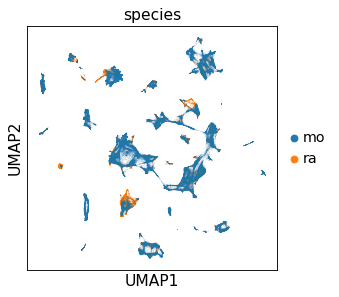

In [84]:
sc.pl.umap(aligned_sm.adata,color=["species"],save="_samap_species.pdf")

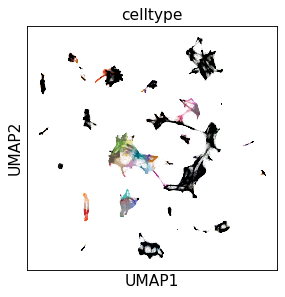

In [85]:
sc.pl.umap(aligned_sm.adata,color=["celltype"],save="_samap_celltype_noleg.pdf",legend_loc=None)

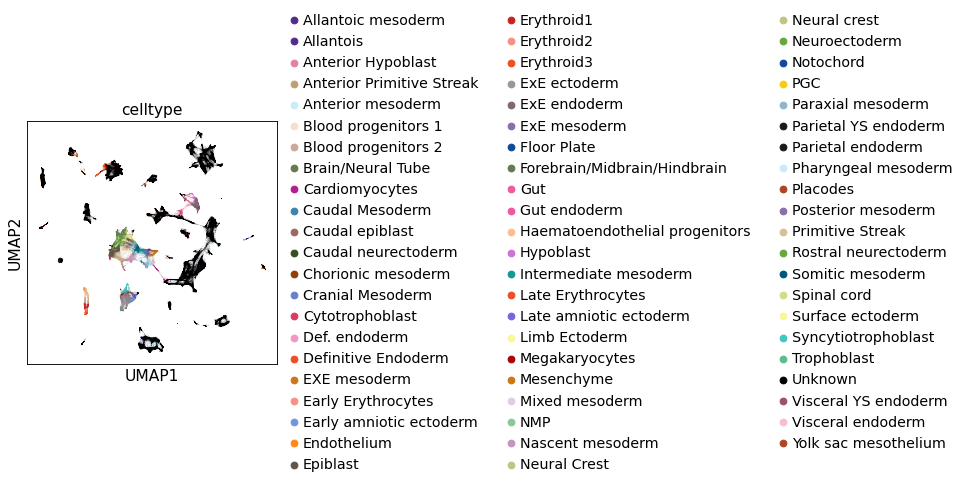

In [86]:
sc.pl.umap(aligned_sm.adata,color=["celltype"],save="_samap_sample_celltype_wleg.pdf")

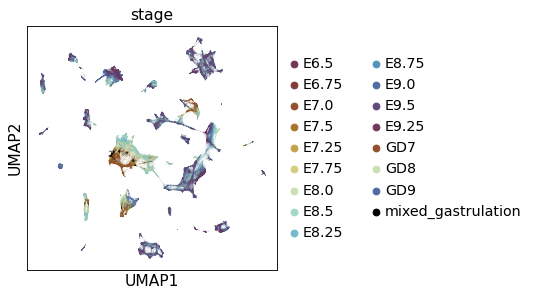

In [87]:
sc.pl.umap(aligned_sm.adata,color=["stage"],save="_samap_stage.pdf")

In [14]:
aligned_sm.adata

AnnData object with n_obs × n_vars = 10000 × 24926
    obs: 'barcode', 'batch', 'cell', 'celltype', 'cluster', 'cluster.stage', 'cluster.sub', 'cluster.theiler', 'colour', 'doub.density', 'doublet', 'endo_gephiX', 'endo_gephiY', 'endo_gutCluster', 'endo_gutDPT', 'endo_gutX', 'endo_gutY', 'endo_trajectoryDPT', 'endo_trajectoryName', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'leiden_clusters', 'sample', 'sequencing.batch', 'sizeFactor', 'sizeFactors', 'stage', 'stripped', 'theiler', 'umapX', 'umapY', 'species'
    var: 'edge_weights'
    uns: 'neighbors', 'mdata', 'umap', 'homology_graph_reweighted', 'homology_graph', 'homology_gene_names', 'homology_gene_names1', 'homology_gene_names2'
    obsm: 'X_umap'
    layers: 'X_disp'
    obsp: 'connectivities'

In [93]:
aligned_sm.adata.obs

,barcode,batch,cell,celltype,celltype.extended,cluster,cluster.stage,cluster.sub,cluster.theiler,doub.density,...,leiden_clusters,louvain,sample,sizeFactor,somite_count,stage,stage.mapped,stripped,tube_name,species
cell_1,ra_AAACCCAAGCCTTCTC,batch1,ra_cell_1,Epiblast,,ra_7,ra_8.0,ra_1.0,ra_True,ra_6.36719787289993,...,ra_9,,ra_1,ra_1.2152048394514314,,GD7,,ra_False,,ra
cell_2,ra_AAACCCACACAATGAA,batch1,ra_cell_2,Hypoblast,,ra_14,ra_13.0,ra_1.0,ra_True,ra_0.0,...,ra_20,,ra_1,ra_0.8610570183446763,,GD7,,ra_False,,ra
cell_4,ra_AAACCCAGTAGGTTTC,batch1,ra_cell_4,Neuroectoderm,,ra_7,ra_3.0,ra_3.0,ra_True,ra_43.0493328125,...,ra_9,,ra_1,ra_0.5699887706928992,,GD7,,ra_False,,ra
cell_5,ra_AAACCCATCTGGACTA,batch1,ra_cell_5,Cytotrophoblast,,ra_6,ra_15.0,ra_2.0,ra_True,ra_8.40278662385465,...,ra_5,,ra_1,ra_0.8911606742468388,,GD7,,ra_False,,ra
cell_6,ra_AAACGAAAGGTGAGAA,batch1,ra_cell_6,Nascent mesoderm,,ra_7,ra_9.0,ra_2.0,ra_True,ra_61.3255500685871,...,ra_17,,ra_1,ra_1.3621865411914411,,GD7,,ra_False,,ra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430334,,batch2,mo_ext_cell_351868,Unknown,mo_Unknown,mo_30,,mo_5,,,...,mo_0,mo_8,mo_105,,mo_20,E9.5,mo_E9.5,,mo_YS,mo
430335,,batch2,mo_ext_cell_351869,Unknown,mo_Unknown,mo_30,,mo_8,,,...,mo_0,mo_8,mo_105,,mo_20,E9.5,mo_E9.5,,mo_YS,mo
430336,,batch2,mo_ext_cell_351870,Unknown,mo_Unknown,mo_30,,mo_8,,,...,mo_0,mo_8,mo_105,,mo_20,E9.5,mo_E9.5,,mo_YS,mo
430337,,batch2,mo_ext_cell_351871,Unknown,mo_Unknown,mo_30,,mo_3,,,...,mo_0,mo_8,mo_105,,mo_20,E9.5,mo_E9.5,,mo_YS,mo


### Add updated extended atlas annotations

In [7]:
mext_meta = pd.read_csv(base_path + "data/processed/mouse_extended_atlas/meta_v2.tsv",sep="\t")

/nfs/research1/marioni/dkeitley/anaconda/envs/SAMap/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
mext_meta

,cell,sample,stage,stage.mapped,stage.collapsed,stage.mapped.collapsed,somite_count,tube_name,tube_name_corrected,celltype,celltype.extended,celltype.descendant,celltype.descendant.somites,doub.density,cluster,cluster.sub,celltype.clustering
1,cell_1,1,E6.5,E6.5,E6.5,E6.5,Undetermined,Undetermined,Undetermined,Epiblast,Epiblast,Epiblast,Epiblast,0.043114,7,5,Epiblast
2,cell_2,1,E6.5,E6.5,E6.5,E6.5,Undetermined,Undetermined,Undetermined,Primitive Streak,Primitive Streak,Primitive Streak,Primitive Streak,1.129713,7,6,Primitive Streak
3,cell_5,1,E6.5,E6.5,E6.5,E6.5,Undetermined,Undetermined,Undetermined,ExE ectoderm,ExE ectoderm,ExE ectoderm,ExE ectoderm,0.112121,1,6,ExE ectoderm
4,cell_6,1,E6.5,E6.5,E6.5,E6.5,Undetermined,Undetermined,Undetermined,Epiblast,Epiblast,Epiblast,Epiblast,1.254709,7,2,Epiblast
5,cell_8,1,E6.5,E6.5,E6.5,E6.5,Undetermined,Undetermined,Undetermined,Epiblast,Epiblast,Epiblast,Epiblast,1.345759,7,1,Epiblast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430335,ext_cell_351868,105,E9.5,E9.5,E9.25,E9.25,20,YS,YS,Undetermined,Undetermined,Erythroid2,Erythroid2,0.639114,30,5,Erythroid
430336,ext_cell_351869,105,E9.5,E9.5,E9.25,E9.25,20,YS,YS,Undetermined,Undetermined,Erythroid3,Erythroid3,0.219459,30,8,Erythroid
430337,ext_cell_351870,105,E9.5,E9.5,E9.25,E9.25,20,YS,YS,Undetermined,Undetermined,Erythroid2,Erythroid2,0.236142,30,8,Erythroid
430338,ext_cell_351871,105,E9.5,E9.5,E9.25,E9.25,20,YS,YS,Undetermined,Undetermined,Erythroid2,Erythroid2,0.235135,30,3,Erythroid


In [21]:
mext_meta["celltype.clustering"].unique()

array(['Epiblast', 'Primitive Streak', 'ExE ectoderm',
       'Visceral endoderm', 'ExE endoderm', 'Non-neural ectoderm 5',
       'Nascent mesoderm', 'Ectoderm', 'Blood progenitors',
       'Paraxial mesoderm', 'Caudal epiblast', 'Lateral plate mesoderm',
       'Intermediate mesoderm', 'Cardiopharyngeal progenitors SHF', 'PGC',
       'Mesenchyme', 'Haematoendothelial progenitors', 'Gut tube',
       'Cardiomyocytes FHF 1', 'Allantois endothelium', 'Node',
       'Erythroid', 'Embryo proper endothelium',
       'Anterior somitic tissues', 'Cranial mesoderm',
       'Non-neural ectoderm 3', 'Parietal endoderm',
       'Anterior Primitive Streak', 'Presomitic mesoderm', 'Allantois',
       'Non-neural ectoderm 4', 'EMP',
       'Anterior cardiopharyngeal progenitors', 'Pharyngeal mesoderm',
       'Limb mesoderm', 'Midgut', 'Venous endothelium',
       'Pharyngeal endoderm', 'Hindgut', 'Notochord', 'Epicardium',
       'Posterior somitic tissues', 'Optic vesicle', 'Somitic mesoderm',
 

In [13]:
r_celltypes = pd.read_csv(base_path + "data/processed/rabbit/annotation_12-07-21.tsv",sep="\t",index_col=0)

In [14]:
r_celltypes

,updated_celltype
cell_1,Epiblast
cell_2,Hypoblast
cell_4,Epiblast
cell_5,Cytotrophoblast
cell_6,Caudal mesoderm
...,...
cell_172991,Erythroid
cell_172992,EMP
cell_172993,Erythroid
cell_172994,EMP


In [96]:
r_sam.adata.n_obs

146133

In [21]:
updated_celltypes = r_celltypes["updated_celltype"].append(mext_meta["celltype.clustering"])

In [22]:
updated_celltypes.index = rm_samap.obs.index

In [23]:
updated_celltypes

cell_1           Epiblast
cell_2          Hypoblast
cell_4           Epiblast
cell_5    Cytotrophoblast
cell_6    Caudal mesoderm
               ...       
430334          Erythroid
430335          Erythroid
430336          Erythroid
430337          Erythroid
430338          Erythroid
Length: 576472, dtype: object

In [6]:
# Remove prefix from celltypes
aligned_sm_adata.obs["celltype"] = [ct[3:] for ct in aligned_sm_adata.obs["celltype"]]
aligned_sm_adata.obs["stage"] = [st[3:] for st in aligned_sm_adata.obs["stage"]]


In [46]:
# Add species tag to cell types so can be highlighted by sc.pl.umap group parameter
rm_samap.obs["celltype"] = updated_celltypes
rm_samap.obs["species_celltype"] =  rm_samap.obs["species"].astype(str).str.cat(updated_celltypes, sep='') 
rm_samap.obs["species_celltype"]

cell_1           raEpiblast
cell_2          raHypoblast
cell_4           raEpiblast
cell_5    raCytotrophoblast
cell_6    raCaudal mesoderm
                ...        
430334          moErythroid
430335          moErythroid
430336          moErythroid
430337          moErythroid
430338          moErythroid
Name: species_celltype, Length: 576472, dtype: object

In [38]:
pd.read_csv("mouse-extended/aligned_samap_umap_min_dist_08.tsv",sep="\t",header=None)

,0,1
0,13.427628,0.047281
1,-3.378753,13.291205
2,12.419685,-0.815584
3,0.083493,2.217427
4,11.553802,-2.206846
...,...,...
576467,0.196359,22.177521
576468,-0.034167,22.405590
576469,0.365335,22.185669
576470,0.843817,22.226948


In [42]:
# Add UMAP
umap08 = pd.read_csv("mouse-extended/aligned_samap_umap_min_dist_08.tsv",sep="\t",header=None)
umap08.index = rm_samap.obs.index
rm_samap.obsm["X_umap"] = umap08

In [60]:
celltype_colour_list = [celltype_colours[x[2:]] for x in np.unique(rm_samap.obs["species_celltype"])]
rm_samap.uns["species_celltype_colors"] = celltype_colour_list

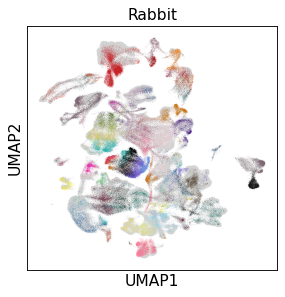

In [71]:
sc.pl.umap(rm_samap,color=["species_celltype"], groups=[celltype for celltype in rm_samap.obs["species_celltype"].unique() if celltype.startswith('ra')],
          palette=celltype_colour_list,save="_mindist08_samap_celltype_rabbit_highlight.pdf",title="Rabbit",legend_loc="none")

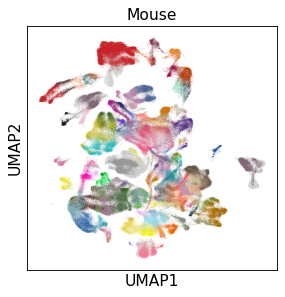

In [72]:
sc.pl.umap(rm_samap,color=["species_celltype"], groups=[celltype for celltype in rm_samap.obs["species_celltype"].unique() if celltype.startswith('mo')],
          palette=celltype_colour_list,save="_mindist08_samap_celltype_mouse_highlight.pdf",title="Mouse",legend_loc="none")

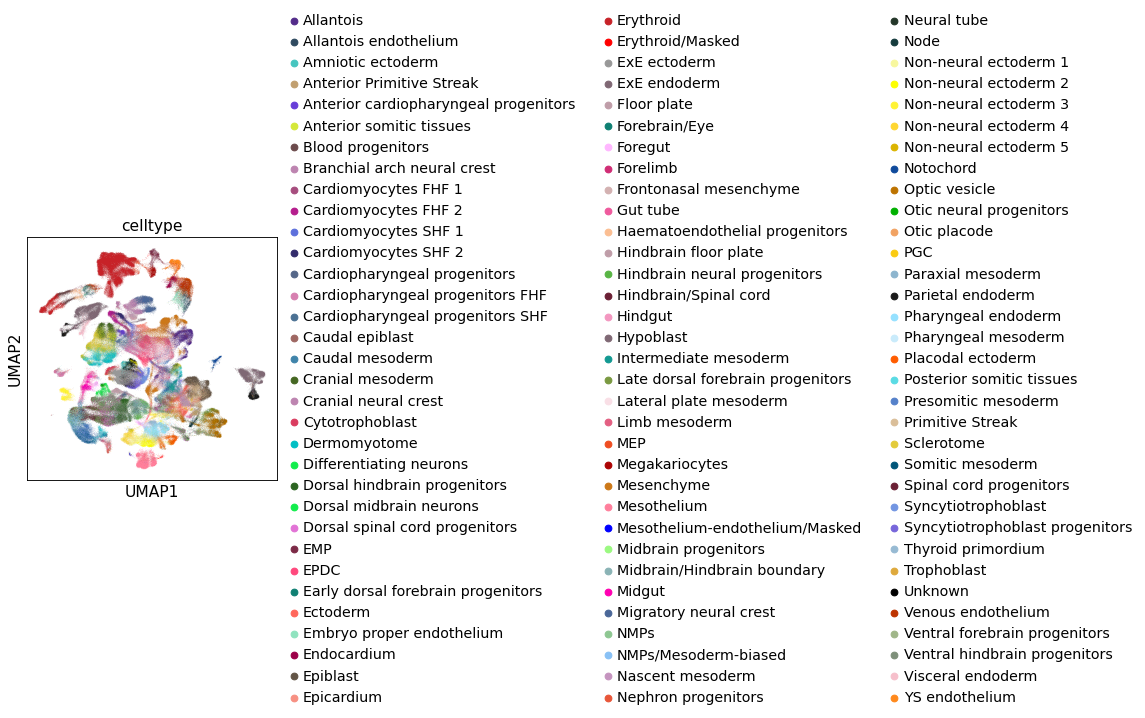

In [75]:
celltype_colour_list = [celltype_colours[x] for x in np.unique(rm_samap.obs["celltype"])]
rm_samap.uns["celltype_colors"] = celltype_colour_list
sc.pl.umap(rm_samap,color=["celltype"],
          palette=celltype_colour_list,save="_mindist08_samap_celltype_wleg.pdf")

In [18]:
updated_celltypes

cell_1           Epiblast
cell_2          Hypoblast
cell_4           Epiblast
cell_5    Cytotrophoblast
cell_6    Caudal mesoderm
               ...       
430334          Erythroid
430335          Erythroid
430336          Erythroid
430337          Erythroid
430338          Erythroid
Length: 576472, dtype: object

In [11]:
rm_samap.obs["updated_celltype"] = updated_celltypes

In [43]:
aligned_sm_adata.obs["updated_celltype"]

cell_1            Epiblast
cell_2           Hypoblast
cell_4       Neuroectoderm
cell_5     Cytotrophoblast
cell_6    Nascent mesoderm
                ...       
430334           Erythroid
430335           Erythroid
430336           Erythroid
430337           Erythroid
430338           Erythroid
Name: updated_celltype, Length: 576472, dtype: object

In [22]:
celltype_colour_list = [ext_celltype_colours[x] for x in np.unique(aligned_sm_adata.obs["updated_celltype"])]
aligned_sm_adata.uns["updated_celltype_colors"] = celltype_colour_list

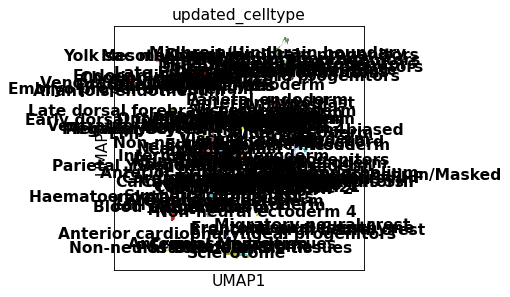

In [35]:
sc.pl.umap(aligned_sm_adata,color=["updated_celltype"],legend_loc="on data",save="_samap_updated_celltype_wtext.pdf")

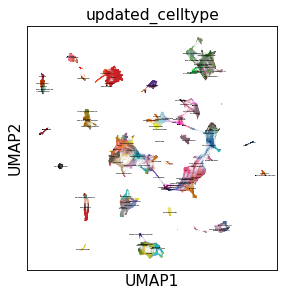

In [36]:
sc.pl.umap(aligned_sm_adata,color=["updated_celltype"],legend_loc='on data',legend_fontsize=1,save="_samap_updated_celltype_wtext.pdf")

In [ ]:
sc.pp.neighbors(aligned_sm_adata,n_neighbors=150)

         Falling back to preprocessing with `sc.pp.pca` and default params.
/nfs/research1/marioni/dkeitley/anaconda/envs/SAMap/lib/python3.7/site-packages/scanpy/preprocessing/_pca.py:312: RuntimeWarning: invalid value encountered in true_divide
  ev_ratio = ev / total_var


In [46]:
aligned_sm_adata.uns["neighbors"]

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 150, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean'}}
With overloaded keys:
	['connectivities', 'distances'].

In [57]:
sc.tl.umap(aligned_sm_adata,min_dist=0.8)

/nfs/research1/marioni/dkeitley/anaconda/envs/SAMap/lib/python3.7/site-packages/umap/spectral.py:319: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


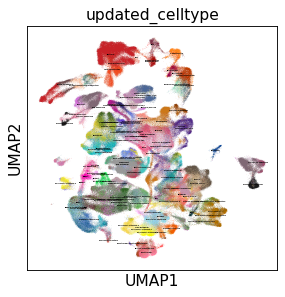

In [59]:
sc.pl.umap(aligned_sm_adata,color=["updated_celltype"],legend_loc='on data',legend_fontsize=1.5,save="_samap_updated_celltype_wtext_min_dist_08.pdf")

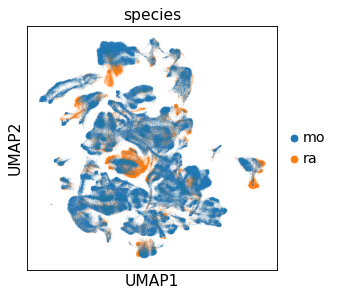

In [60]:
sc.pl.umap(aligned_sm_adata,color=["species"],save="_samap_species_min_dist_08.pdf")

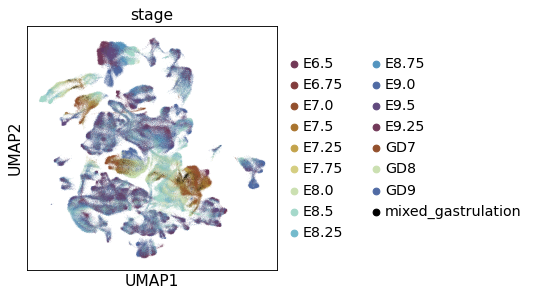

In [61]:
sc.pl.umap(aligned_sm_adata,color=["stage"],save="_samap_stage_min_dist_08.pdf")

In [62]:
np.savetxt("mouse-extended/aligned_samap_umap_min_dist_08.tsv",aligned_sm_adata.obsm["X_umap"],delimiter="\t")

In [ ]:
aligned_sm_adata.obs["updated_celltype"]

In [ ]:
D1,D2,MappingTable = get_mapping_scores(aligned_sm_adata,k1,k2)


In [39]:
import dill

In [40]:
session = dill.load("mouse-extended/samap_rabbit-mouse-ext_notebook_env.db")

TypeError: file must have 'read' and 'readline' attributes

## Plot 3d umap

In [ ]:
sc.tl.umap(aligned_sm_adata, min_dist = 0.99, n_components = 3)

## Plot PAGA graph

In [86]:
aligned_sm_adata.uns["neighbors"]["distance"]

KeyError: 'distance'

In [82]:
test

OverloadedDict, wrapping:
	{'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 15, 'use_rep': 'X'}}
With overloaded keys:
	['connectivities', 'distances'].

In [87]:
sc.tl.paga(aligned_sm_adata,"updated_celltype",model='v1.0')

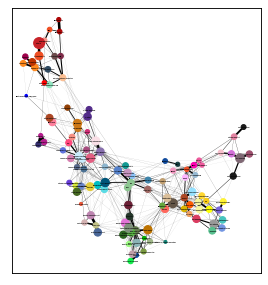

In [106]:
sc.pl.paga(aligned_sm_adata,fontsize=1,node_size_scale=0.3,edge_width_scale=0.3,save="_medium_samap_updated_celltype.pdf")

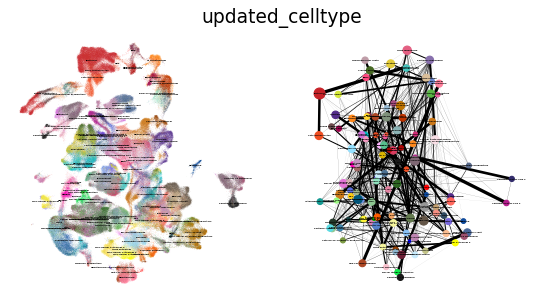

In [107]:
sc.pl.paga_compare(aligned_sm_adata,fontsize=2,legend_fontsize=2,save="_compare_updated_celltype.pdf",
                  node_size_scale=0.3,edge_width_scale=0.3)

## Plot force atlas

In [4]:
sc.tl.draw_graph(aligned_sm_adata,layout='fa')

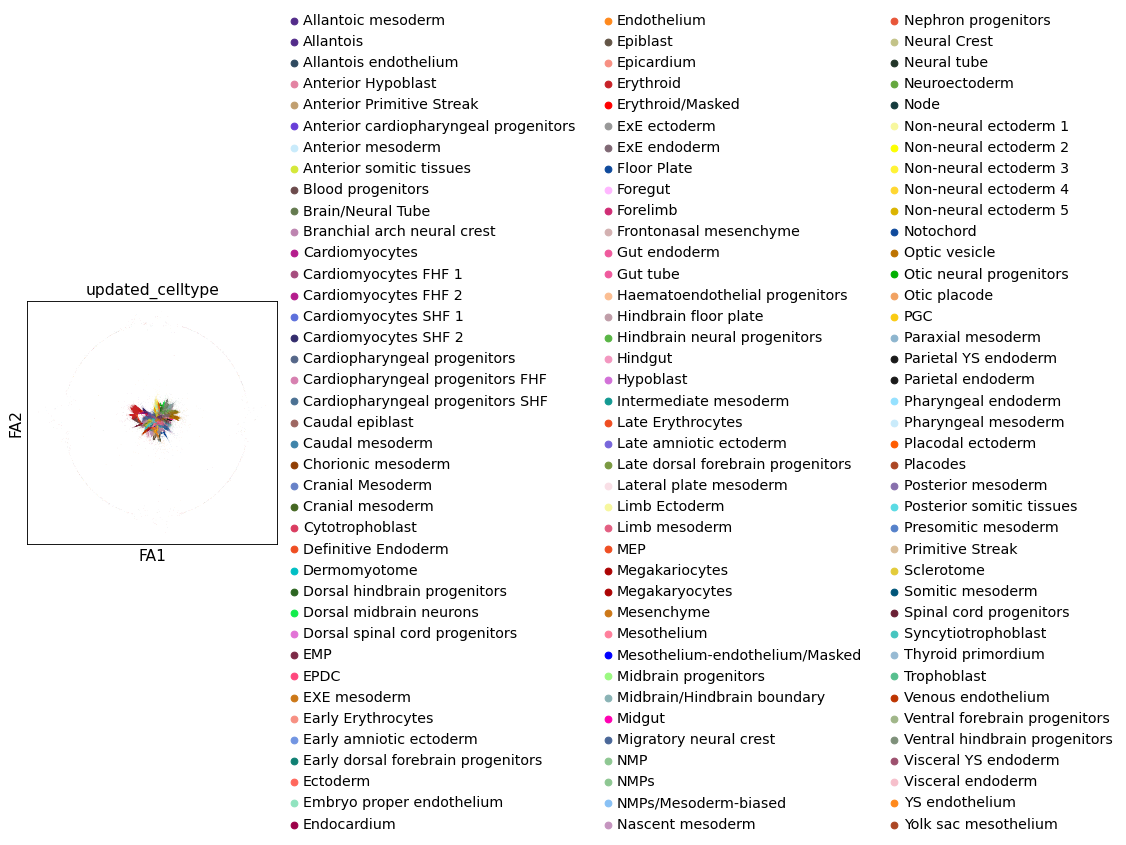

In [23]:
sc.pl.draw_graph(aligned_sm_adata,color='updated_celltype')

## Find rabbit nearest neighbours

In [36]:
aligned_sm_adata.uns["edge_weights"]

KeyError: 'edge_weights'

In [26]:
aligned_sm_adata.obsp["connectivities"][0:4,14:4]

matrix([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [57]:
mouse_nns = np.argmax(aligned_sm_adata.uns["mdata"]["knn_1v2"],axis=1)

TypeError: expected sequence object with len >= 0 or a single integer

In [66]:
np.array(mouse_nns).flatten()

array([  5600,  40225,    366, ..., 412830, 412671,  97072])

In [62]:
mext_meta[np.array(mouse_nns).flatten(),"celltype.clustering"]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [71]:
pd.DataFrame(mext_meta.iloc[np.array(mouse_nns).flatten(),:].loc[:,"celltype.clustering"].values).to_csv("rabbit_samap_nearest_neighbours.csv")

430339

## Debug

In [1]:
!pip install --upgrade --force-reinstall --no-cache-dir hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.3 MB 16.9 MB/s eta 0:00:01         | 2.5 MB 16.9 MB/s eta 0:00:019 MB/s eta 0:00:01/s eta 0:00:01�█████▉          | 10.5 MB 16.9 MB/s eta 0:00:01��███████████▏   | 13.5 MB 16.9 MB/s eta 0:00:01
  Created wheel for hnswlib: filename=hnswlib-0.5.1-cp37-cp37m-linux_x86_64.whl size=1121789 sha256=7909c3e9e2d56772963f8eb9a8c26385e278cfb1ea86752bfac534788aa8070a
  Stored in directory: /scratch/pip-ephem-wheel-cache-e41owmex/wheels/f0/5c/c4/0a4a00b766dada8e88a4573cf73b7bb4fe2927dd9000bd6f29
Successfully built hnswlib
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: hnswlib
    Found existing installation: hnswlib 0.5.1
    Uninstalling hnswlib-0.5.1:
      Successfully uninstalled hnswlib-0.5.1


In [2]:
import hnswlib
p1 = hnswlib.Index(space="cosine", dim=(4,4))

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. hnswlib.Index(params: dict)
    2. hnswlib.Index(index: hnswlib.Index)
    3. hnswlib.Index(space: str, dim: int)

Invoked with: kwargs: space='cosine', dim=(4, 4)

In [2]:
m_data


NameError: name 'm_data' is not defined

In [5]:
m_data = sc.read_h5ad("../data-in/mouse/anndata.h5ad")

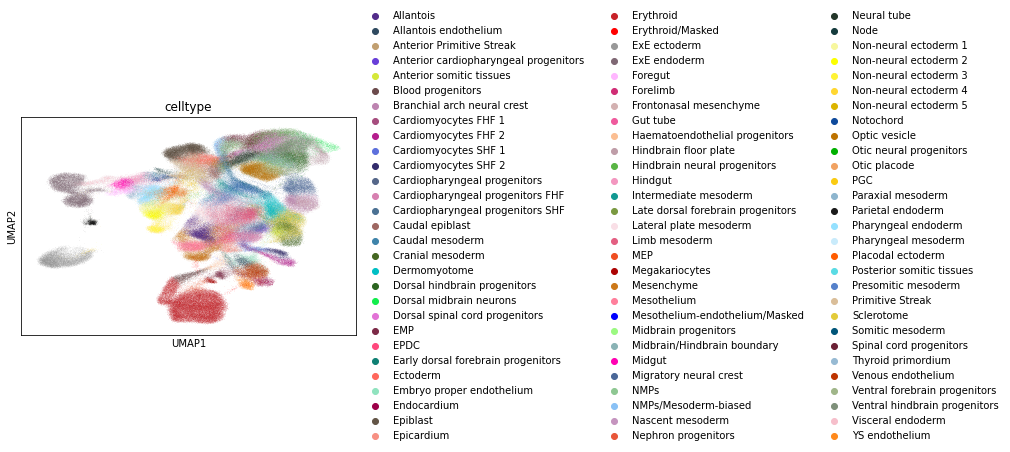

In [23]:
sc.pl.umap(m_data,color=["celltype"],color_map="viridis_r")